In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
from scipy import stats
import statsmodels.api as sm
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import umap.umap_ as umap
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.svm import OneClassSVM, SVC
from sklearn.neighbors import LocalOutlierFactor
from sklearn.mixture import GaussianMixture
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from pyod.models.copod import COPOD


# Define the path to the dataset
file_path = 'Dataset4_EWS.xlsx'


Data columns: ['Data', 'BDIY', 'CRY', 'Cl1', 'DXY', 'ECSURPUS', 'EMUSTRUU', 'EONIA', 'GBP', 'GT10', 'GTDEM10Y', 'GTDEM2Y', 'GTDEM30Y', 'GTGBP20Y', 'GTGBP2Y', 'GTGBP30Y', 'GTITL10YR', 'GTITL2YR', 'GTITL30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTJPY30YR', 'JPY', 'LF94TRUU', 'LF98TRUU', 'LG30TRUU', 'LMBITR', 'LP01TREU', 'LUACTRUU', 'LUMSTRUU', 'MXBR', 'MXCN', 'MXEU', 'MXIN', 'MXJP', 'MXRU', 'MXUS', 'US0001M', 'USGG2YR', 'USGG30YR', 'USGG3M', 'VIX', 'XAUBGNL', 'Y']
Data shape: (1111, 42)
Total number of records: 1111
Time period: from 01/11/2000 to 04/20/2021
Frequency: W-TUE
Number of variables: 42
Number of anomalies: 237 (21.33%)

Metadata and statistics:


,Ticker,Description,Mean,Std.Dev,Min,Max,Missing values,Missing (%)
0,BDIY,Baltic Dry Index,2259.860486,2017.811888,291.00000,11793.00000,0,0.00%
1,CRY,TR/CC CRB ER Index,245.247649,68.278081,106.29290,467.57000,0,0.00%
2,Cl1,Generic 1st 'CL' Future,60.708101,25.900813,10.01000,140.97000,0,0.00%
3,DXY,DOLLAR INDEX SPOT,90.934982,11.379095,71.32900,119.82000,0,0.00%
4,ECSURPUS,Bloomberg ECO US Surprise Inde,0.036153,0.349453,-0.97400,0.99100,0,0.00%
5,EMUSTRUU,EM USD Aggregate,704.379495,309.951768,230.52670,1286.35300,0,0.00%
6,EONIA,EMMI EURO OverNight Index Aver,1.363676,1.721894,-0.49800,5.73000,0,0.00%
7,GBP,British Pound Spot,1.569618,0.212340,1.17230,2.08520,0,0.00%
8,GT10,US TREASURY N/B,3.266748,1.332464,0.50800,6.74800,0,0.00%
9,GTDEM10Y,BUNDESREPUB. DEUTSCHLAND,2.448365,1.851558,-0.79400,5.64400,0,0.00%


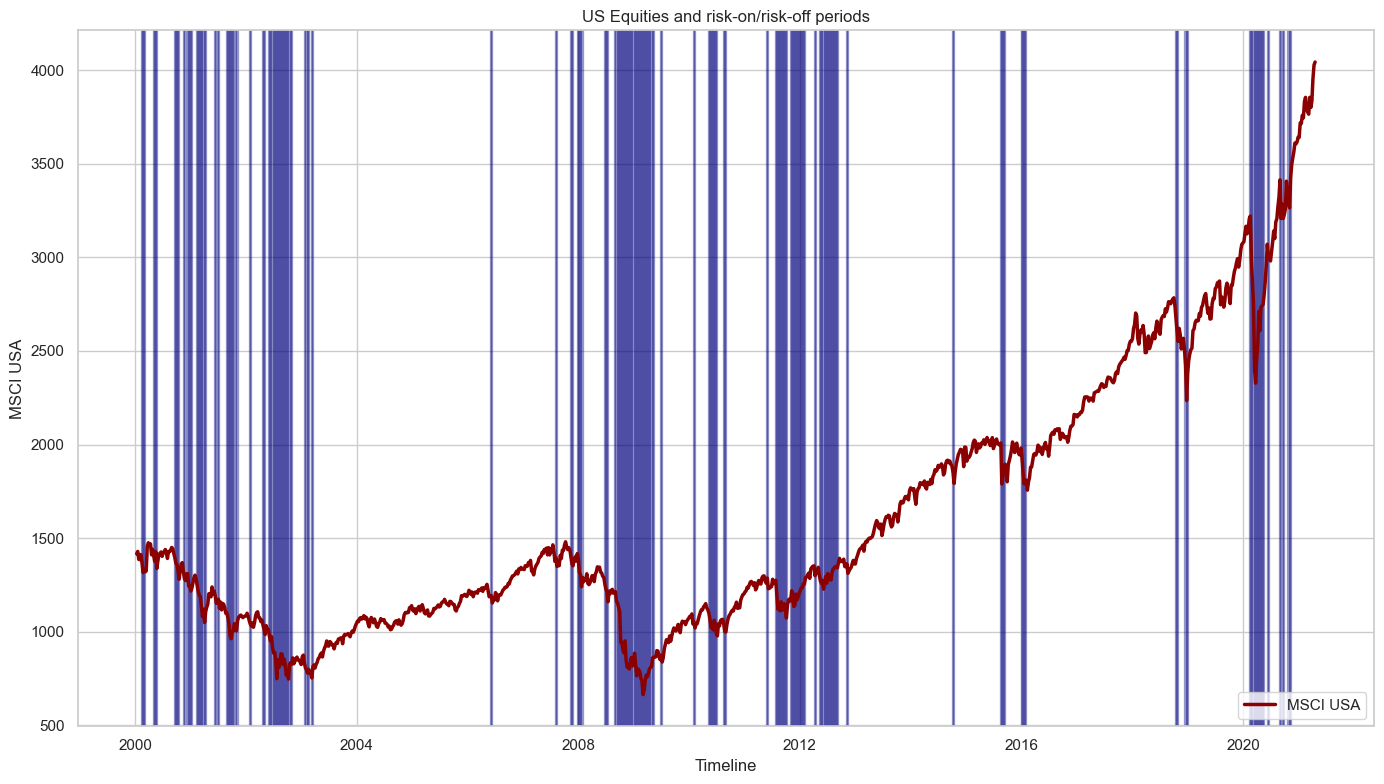

In [3]:
# Set visualization style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

# Load the data from the Excel file
# First sheet contains market data with dates and anomaly labels, second sheet contains metadata
data_df = pd.read_excel(file_path, sheet_name='Markets')
metadata_df = pd.read_excel(file_path, sheet_name='Metadata')

# Check the structure of the loaded data
print("Data columns:", data_df.columns.tolist())

# Extract date and anomaly label columns
date_col = 'Date' if 'Date' in data_df.columns else data_df.columns[0]
y_col = 'Y' if 'Y' in data_df.columns else None

# Convert dates to datetime format
data_df[date_col] = pd.to_datetime(data_df[date_col], dayfirst=True)  # Date format is dd/mm/yy

# Set date as index
data_df = data_df.set_index(date_col)

# Extract features (all columns except Y if it exists)
if y_col:
    X_df = data_df.drop(y_col, axis=1)
    y = data_df[y_col].values
else:
    X_df = data_df
    y = None

# Display basic information about the dataset
print(f"Data shape: {X_df.shape}")
print(f"Total number of records: {len(X_df)}")
print(f"Time period: from {X_df.index.min().strftime('%m/%d/%Y')} to {X_df.index.max().strftime('%m/%d/%Y')}")
print(f"Frequency: {pd.infer_freq(X_df.index) or 'Weekly'}")
print(f"Number of variables: {X_df.shape[1]}")
if y_col:
    print(f"Number of anomalies: {np.sum(y == 1)} ({np.mean(y == 1)*100:.2f}%)")

# Create a more comprehensive metadata table with additional statistics
enhanced_metadata = []

# Determine the correct column names for ticker and description
ticker_col = 'ticker' if 'ticker' in metadata_df.columns else metadata_df.columns[0]
desc_col = 'description' if 'description' in metadata_df.columns else metadata_df.columns[1] if len(metadata_df.columns) > 1 else ticker_col

for ticker in X_df.columns:
    # Get metadata for this ticker if available
    meta_row = metadata_df[metadata_df[ticker_col] == ticker] if ticker in metadata_df[ticker_col].values else pd.DataFrame()

    # Get description or use ticker if not found
    description = meta_row[desc_col].values[0] if not meta_row.empty and desc_col in meta_row.columns else ticker

    # Calculate statistics for this series
    series = X_df[ticker]

    enhanced_metadata.append({
        'Ticker': ticker,
        'Description': description,
        'Mean': series.mean(),
        'Std.Dev': series.std(),
        'Min': series.min(),
        'Max': series.max(),
        'Missing values': series.isna().sum(),
        'Missing (%)': f"{series.isna().mean()*100:.2f}%"
    })

# Create enhanced metadata dataframe
enhanced_meta_df = pd.DataFrame(enhanced_metadata)

# Display the enhanced metadata
print("\nMetadata and statistics:")
display(enhanced_meta_df)

# Create a plot with anomalies as vertical bars and MXUS as a line
if y_col and 'MXUS' in X_df.columns:
    fig, ax = plt.subplots(figsize=(14, 8))

    # Plot MXUS line
    ax.plot(X_df.index, X_df['MXUS'], color='darkred', linewidth=2.5, label='MSCI USA')

    # Get the y-axis limits after plotting MXUS
    y_min, y_max = ax.get_ylim()

    # For each anomaly point (Y=1), create a vertical span across the entire plot
    for i, (date, is_anomaly) in enumerate(zip(X_df.index, y)):
        if is_anomaly == 1:
            ax.axvspan(date, date + pd.Timedelta(days=7), alpha=0.3, color='navy', label='Risk-on/Risk-off' if i == 0 else "")

    # Set labels and title
    ax.set_xlabel('Timeline')
    ax.set_ylabel('MSCI USA')
    ax.set_title('US Equities and risk-on/risk-off periods')

    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='best')

    plt.tight_layout()
    plt.show()
else:
    print("Either 'Y' column or 'MXUS' column is missing in the dataset.")


In [4]:
# Make data stationary based on variable type
# So w define lists of variables by type
indices_currencies = [col for col in X_df.columns if col in [
    'XAUBGNL', 'BDIY', 'CRY', 'Cl1', 'DXY', 'EMUSTRUU', 'GBP', 'JPY', 'LF94TRUU',
    'LF98TRUU', 'LG30TRUU', 'LMBITR', 'LP01TREU', 'LUACTRUU', 'LUMSTRUU',
    'MXBR', 'MXCN', 'MXEU', 'MXIN', 'MXJP', 'MXRU', 'MXUS', 'VIX'
]]

interest_rates = [col for col in X_df.columns if col in [
    'EONIA', 'GTDEM10Y', 'GTDEM2Y', 'GTDEM30Y', 'GTGBP20Y', 'GTGBP2Y', 'GTGBP30Y',
    'GTITL10YR', 'GTITL2YR', 'GTITL30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTJPY30YR',
    'US0001M', 'USGG3M', 'USGG2YR', 'GT10', 'USGG30YR'
]]

# Create a new dataframe for stationary data
stationary_df = pd.DataFrame(index=X_df.index[1:])

# Apply log-differences to indices and currencies (always positive)
for col in indices_currencies:
    if col in X_df.columns:
        stationary_df[col] = np.diff(np.log(X_df[col]))

# Apply first differences to interest rates (can be negative or very close to 0)
for col in interest_rates:
    if col in X_df.columns: 
        stationary_df[col] = np.diff(X_df[col])

# Keep Bloomberg Economic US Surprise Index as is (already stationary)
if 'ECSURPUS' in X_df.columns:
    stationary_df['ECSURPUS'] = X_df['ECSURPUS'].values[1:]

# Adjust the response variable to match the new data length
if y is not None:
    y_stationary = y[1:]
else:
    y_stationary = None


In [5]:
# Step 1: shuffle and split data into training, validation, and test sets
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate


# Set visualization style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 8]

# Convert to numpy arrays for easier manipulation
X = stationary_df.values
y = y_stationary


total = len(X)
normal_count = np.sum(y == 0)
anomaly_count = np.sum(y == 1)
normal_pct = np.mean(y == 0) * 100
anomaly_pct = np.mean(y == 1) * 100

rows = [
    ["Total records", total, ""],
    ["Normal",        normal_count, f"{normal_pct:.2f}%"],
    ["Anomalies",     anomaly_count, f"{anomaly_pct:.2f}%"]
]

print(tabulate(rows, headers=[" ","Count","Percentage"], tablefmt="github"))
print("\n\n")


# Step 1: Creating training/cross-validation/test set with reshuffling

# Reshuffle the data (this will break down autocorrelation)
X_shuffled, y_shuffled = shuffle(X, y, random_state=42)

# Separate normal and anomalous examples
X_normal = X_shuffled[y_shuffled == 0]
X_anomaly = X_shuffled[y_shuffled == 1]

# Calculate sizes for each set
n_normal = X_normal.shape[0]
n_anomaly = X_anomaly.shape[0]

# Training set: 80% of normal examples
train_size = int(0.8 * n_normal)
X_train = X_normal[:train_size]

# Cross-validation set: 10% of normal examples and 50% of anomalies
cv_normal_size = int(0.1 * n_normal)
cv_anomaly_size = int(0.5 * n_anomaly)
X_cv_normal = X_normal[train_size:train_size + cv_normal_size]
X_cv_anomaly = X_anomaly[:cv_anomaly_size]
X_cross_val = np.vstack((X_cv_normal, X_cv_anomaly))
y_cross_val = np.hstack((np.zeros(cv_normal_size), np.ones(cv_anomaly_size)))

# Test set: 10% of normal examples and 50% of anomalies
X_test_normal = X_normal[train_size + cv_normal_size:]
X_test_anomaly = X_anomaly[cv_anomaly_size:]
X_test = np.vstack((X_test_normal, X_test_anomaly))
y_test = np.hstack((np.zeros(len(X_test_normal)), np.ones(len(X_test_anomaly))))

# We'll standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_cross_val = scaler.transform(X_cross_val)
X_test = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]} (all normal)")
print(f"Cross-validation set size: {X_cross_val.shape[0]} ({cv_normal_size} normal, {cv_anomaly_size} anomalies)")
print(f"Test set size: {X_test.shape[0]} ({len(X_test_normal)} normal, {len(X_test_anomaly)} anomalies)")


|               |   Count | Percentage   |
|---------------|---------|--------------|
| Total records |    1110 |              |
| Normal        |     873 | 78.65%       |
| Anomalies     |     237 | 21.35%       |



Training set size: 698 (all normal)
Cross-validation set size: 205 (87 normal, 118 anomalies)
Test set size: 207 (88 normal, 119 anomalies)


In [6]:
# Set visualization style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 8]

# We already have X_train, X_cross_val, y_cross_val, X_test, y_test from previous code cells
# We'll standardize the data for better performance with many algorithms
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_cv_scaled = scaler.transform(X_cross_val)
X_test_scaled = scaler.transform(X_test)


# --- Prepare data for GAN Optuna tuning ---
X_train_norm = X_train_scaled            # all‐normal examples for training
X_cv, y_cv   = X_cv_scaled, y_cross_val  # CV set for F1 evaluation
raw_contam   = np.mean(y_cv)
contam       = min(raw_contam, 0.5)

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
import umap
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score,
    confusion_matrix
)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

class GANomalyDetector:
    """
    Comprehensive GAN-based anomaly detection with enhanced evaluation and visualization:
    - Vanilla GAN scoring via discriminator
    - f-AnoGAN: reconstruction + feature-matching
    - Feature importance from reconstruction errors
    - ROC, Precision-Recall, Score histograms
    - Confusion matrix, PCA & UMAP projections
    Usage:
        model = GANomalyDetectorFull(data_dim, latent_dim=32, lambda_fm=0.1)
        # Vanilla GAN
        model.fit_gan(X_train)
        model.set_gan_threshold(X_train, contam)
        y_pred, y_score = model.predict_gan(X_cv)
        model.evaluate_gan(X_cv, y_cv)
        model.plot_confusion_matrix(y_cv, y_pred, 'Vanilla GAN')
        model.plot_precision_recall(y_cv, y_score, 'Vanilla GAN')
        model.plot_score_histogram(y_cv, y_score, 'Vanilla GAN')
        model.plot_pca(X_cv, y_cv, y_pred, 'Vanilla GAN')
        model.plot_umap(X_cv, y_cv, y_pred, 'Vanilla GAN')

        # f-AnoGAN
        model.fit_encoder(X_train)
        model.set_recon_threshold(X_train, contam)
        y_pred, y_score = model.predict_fanogan(X_test)
        model.evaluate_fanogan(X_test, y_test)
        model.plot_confusion_matrix(y_test, y_pred, 'f-AnoGAN')
        model.plot_precision_recall(y_test, y_score, 'f-AnoGAN')
        model.plot_score_histogram(y_test, y_score, 'f-AnoGAN')
        model.plot_pca(X_test, y_test, y_pred, 'f-AnoGAN')
        model.plot_umap(X_test, y_test, y_pred, 'f-AnoGAN')
    """
    def __init__(self, data_dim, latent_dim=32, lambda_fm=0.1, device=None):
        self.device = device or torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.data_dim = data_dim
        self.latent_dim = latent_dim
        self.lambda_fm = lambda_fm
        self._build_networks()

    def _build_networks(self):
        # Generator
        self.G = nn.Sequential(
            nn.Linear(self.latent_dim, 64), nn.LeakyReLU(0.2), nn.BatchNorm1d(64),
            nn.Linear(64, 128), nn.LeakyReLU(0.2), nn.BatchNorm1d(128),
            nn.Linear(128, self.data_dim)
        ).to(self.device)
        # Discriminator
        self.D1 = nn.Sequential(nn.Linear(self.data_dim, 128), nn.LeakyReLU(0.2), nn.Dropout(0.3))
        self.D2 = nn.Sequential(nn.Linear(128, 64), nn.LeakyReLU(0.2), nn.Dropout(0.3))
        self.Dout = nn.Sequential(nn.Linear(64, 1), nn.Sigmoid())
        for net in (self.D1, self.D2, self.Dout): net.to(self.device)
        # Encoder
        self.E = nn.Sequential(
            nn.Linear(self.data_dim, 128), nn.LeakyReLU(0.2), nn.Dropout(0.3),
            nn.Linear(128, 64), nn.LeakyReLU(0.2), nn.Dropout(0.3),
            nn.Linear(64, self.latent_dim)
        ).to(self.device)

    def _discriminator(self, x, return_feat=False):
        f1 = self.D1(x)
        f2 = self.D2(f1)
        out = self.Dout(f2)
        return (out, f2) if return_feat else out

    # --- Vanilla GAN ---
    def fit_gan(self, X_train, n_epochs=100, batch_size=128, lr=2e-4):
        loader = DataLoader(TensorDataset(torch.from_numpy(X_train).float()), batch_size=batch_size, shuffle=True)
        optG = optim.Adam(self.G.parameters(), lr=lr, betas=(0.5,0.999))
        optD = optim.Adam(list(self.D1.parameters())+list(self.D2.parameters())+list(self.Dout.parameters()), lr=lr, betas=(0.5,0.999))
        bce = nn.BCELoss()
        for ep in range(1, n_epochs+1):
            for real_batch, in loader:
                real = real_batch.to(self.device); bs = real.size(0)
                # D step
                z = torch.randn(bs, self.latent_dim, device=self.device)
                fake = self.G(z).detach()
                lossD = bce(self._discriminator(real), torch.ones_like(real[:, :1])) + \
                        bce(self._discriminator(fake), torch.zeros_like(real[:, :1]))
                optD.zero_grad(); lossD.backward(); optD.step()
                # G step
                z = torch.randn(bs, self.latent_dim, device=self.device)
                lossG = bce(self._discriminator(self.G(z)), torch.ones(bs,1,device=self.device))
                optG.zero_grad(); lossG.backward(); optG.step()
            if ep % 20 == 0:
                print(f"[GAN] Epoch {ep}/{n_epochs} D={lossD.item():.4f} G={lossG.item():.4f}")

    def set_gan_threshold(self, X_train, contam):
        self.G.eval(); self.D1.eval(); self.D2.eval(); self.Dout.eval()
        with torch.no_grad():
            scores = self._discriminator(torch.from_numpy(X_train).float().to(self.device)).cpu().numpy().ravel()
        self.thr_gan = np.percentile(scores, 100*(1-contam))

    def predict_gan(self, X):
        self.G.eval(); self.D1.eval(); self.D2.eval(); self.Dout.eval()
        with torch.no_grad():
            scores = self._discriminator(torch.from_numpy(X).float().to(self.device)).cpu().numpy().ravel()
        return (scores < self.thr_gan).astype(int), scores

    def evaluate_gan(self, X, y, name='GAN'):
        preds, scores = self.predict_gan(X)
        p = precision_score(y, preds); r = recall_score(y, preds); f = f1_score(y, preds)
        print(f"{name} — Precision={p:.3f}, Recall={r:.3f}, F1={f:.3f}")
        self.plot_roc(y, scores, name)

    # --- f-AnoGAN ---
    def fit_encoder(self, X_train, enc_epochs=100, batch_size=128, lr=1e-4):
        # Freeze G and D
        for p in self.G.parameters(): p.requires_grad=False
        for net in (self.D1, self.D2, self.Dout):
            for p in net.parameters(): p.requires_grad=False
        loader = DataLoader(TensorDataset(torch.from_numpy(X_train).float()), batch_size=batch_size, shuffle=True)
        optE = optim.Adam(self.E.parameters(), lr=lr); mse = nn.MSELoss()
        for ep in range(1, enc_epochs+1):
            tot=0
            for real_batch, in loader:
                real = real_batch.to(self.device)
                z = self.E(real); rec = self.G(z)
                loss_rec = mse(rec, real)
                _, fr = self._discriminator(real, True)
                _, fr_rec = self._discriminator(rec.detach(), True)
                loss_fm = mse(fr_rec, fr)
                loss = loss_rec + self.lambda_fm*loss_fm
                optE.zero_grad(); loss.backward(); optE.step()
                tot += loss.item()*real.size(0)
            if ep % 10 == 0:
                print(f"[Enc] Epoch {ep}/{enc_epochs} loss={tot/len(loader.dataset):.4f}")

    def set_recon_threshold(self, X_train, contam):
        errs = self._recon_error(X_train)
        self.thr_recon = np.percentile(errs, 100*(1-contam))

    def _recon_error(self, X):
        self.G.eval(); self.E.eval()
        with torch.no_grad():
            X_t = torch.from_numpy(X).float().to(self.device)
            rec = self.G(self.E(X_t))
            errs = ((X_t-rec)**2).mean(dim=1).cpu().numpy()
        return errs

    def predict_fanogan(self, X):
        errs = self._recon_error(X)
        return (errs > self.thr_recon).astype(int), errs

    def evaluate_fanogan(self, X, y, name='f-AnoGAN'):
        preds, errs = self.predict_fanogan(X)
        p = precision_score(y, preds); r = recall_score(y, preds); f = f1_score(y, preds)
        print(f"{name} — Precision={p:.3f}, Recall={r:.3f}, F1={f:.3f}")
        self.plot_roc(y, errs, name)

    # --- Visualization Utilities ---
    def plot_roc(self, y_true, y_score, model_name):
        fpr, tpr, _ = roc_curve(y_true, y_score)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(8,6))
        plt.plot(fpr, tpr, lw=2, label=f'AUC = {roc_auc:.2f}')
        plt.plot([0,1], [0,1], linestyle='--')
        plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve — {model_name}')
        plt.legend(loc='lower right'); plt.tight_layout(); plt.show()

    def plot_precision_recall(self, y_true, y_score, model_name):
        precision, recall, _ = precision_recall_curve(y_true, y_score)
        ap = average_precision_score(y_true, y_score)
        plt.figure(figsize=(8,6))
        plt.plot(recall, precision, lw=2, label=f'AP = {ap:.2f}')
        plt.xlabel('Recall'); plt.ylabel('Precision')
        plt.title(f'Precision–Recall Curve — {model_name}')
        plt.legend(loc='upper right'); plt.grid(alpha=0.3)
        plt.tight_layout(); plt.show()

    def plot_score_histogram(self, y_true, y_score, model_name):
        plt.figure(figsize=(8,6))
        sns.histplot(y_score[y_true==0], label='Normal', stat='density', kde=True)
        sns.histplot(y_score[y_true==1], label='Anomaly', stat='density', kde=True)
        plt.xlabel('Anomaly Score'); plt.title(f'Score Distribution — {model_name}')
        plt.legend(); plt.tight_layout(); plt.show()

    def plot_confusion_matrix(self, y_true, y_pred, model_name):
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(6,5))
        sns.heatmap(cm, annot=True, fmt='d', cbar=False)
        plt.xlabel('Predicted'); plt.ylabel('Actual')
        plt.title(f'Confusion Matrix — {model_name}')
        plt.tight_layout(); plt.show()

    def plot_pca(self, X, y_true, y_pred, model_name):
        # 1) project to 2D
        proj = PCA(n_components=2).fit_transform(X)
        # 2) build a df with category labels
        df = pd.DataFrame(proj, columns=['PC1','PC2'])
        df['Actual']    = y_true
        df['Predicted'] = y_pred
        
        # 3) assign each sample to one of four categories
        df['Category'] = 'Unknown'
        df.loc[(df['Actual'] == 1) & (df['Predicted'] == 1), 'Category'] = 'True Positive'
        df.loc[(df['Actual'] == 0) & (df['Predicted'] == 0), 'Category'] = 'True Negative'
        df.loc[(df['Actual'] == 0) & (df['Predicted'] == 1), 'Category'] = 'False Positive'
        df.loc[(df['Actual'] == 1) & (df['Predicted'] == 0), 'Category'] = 'False Negative'
        
        # 4) define color/marker mapping
        mapping = {
            'False Negative': {'color':'blue',  'marker':'o'},
            'False Positive': {'color':'red',   'marker':'o'},
            'True Negative':  {'color':'grey',  'marker':'o'},
            'True Positive':  {'color':'black', 'marker':'o'}
        }
        
        # 5) plot
        plt.figure(figsize=(8,6))
        for cat, grp in df.groupby('Category'):
            count = len(grp)
            plt.scatter(
                grp['PC1'], grp['PC2'],
                c=mapping[cat]['color'],
                marker=mapping[cat]['marker'],
                alpha=0.7,
                label=f"{cat} ({count})"
            )
        plt.title(f'PCA Projection — {model_name}')
        plt.xlabel('PC1'); plt.ylabel('PC2')
        plt.legend(loc='best')
        plt.tight_layout()
        plt.show()
    
    
    def plot_umap(self, X, y_true, y_pred, model_name):
        # 1) project via UMAP
        proj = umap.UMAP(n_neighbors=15, min_dist=0.1).fit_transform(X)
        # 2) build df with labels
        df = pd.DataFrame(proj, columns=['UMAP1','UMAP2'])
        df['Actual']    = y_true
        df['Predicted'] = y_pred
        
        # 3) assign categories
        df['Category'] = 'Unknown'
        df.loc[(df['Actual'] == 1) & (df['Predicted'] == 1), 'Category'] = 'True Positive'
        df.loc[(df['Actual'] == 0) & (df['Predicted'] == 0), 'Category'] = 'True Negative'
        df.loc[(df['Actual'] == 0) & (df['Predicted'] == 1), 'Category'] = 'False Positive'
        df.loc[(df['Actual'] == 1) & (df['Predicted'] == 0), 'Category'] = 'False Negative'
        
        # 4) same color/marker mapping
        mapping = {
            'False Negative': {'color':'blue',  'marker':'o'},
            'False Positive': {'color':'red',   'marker':'o'},
            'True Negative':  {'color':'grey',  'marker':'o'},
            'True Positive':  {'color':'black', 'marker':'o'}
        }
        
        # 5) plot
        plt.figure(figsize=(10,8))
        for cat, grp in df.groupby('Category'):
            count = len(grp)
            plt.scatter(
                grp['UMAP1'], grp['UMAP2'],
                c=mapping[cat]['color'],
                marker=mapping[cat]['marker'],
                alpha=0.7,
                label=f"{cat} ({count})"
            )
        plt.title(f'UMAP Projection — {model_name}')
        plt.xlabel('UMAP1'); plt.ylabel('UMAP2')
        plt.legend(loc='best')
        plt.tight_layout()
        plt.show()

    
    # --- Feature Importance ---
    def feature_importance(self, X, feature_names=None):
        """
        Compute mean squared reconstruction error per feature.
        Returns a dict{feature_name:importance} if feature_names is given,
        otherwise a numpy array of importances.
        """
        # bring X into tensor form and run through encoder+generator
        X_t = torch.from_numpy(X).float().to(self.device)
        with torch.no_grad():
            rec = self.G(self.E(X_t)).cpu().numpy()
        # per-feature MSE
        errs = (X - rec)**2
        importances = errs.mean(axis=0)
        if feature_names is not None:
            return dict(zip(feature_names, importances))
        return importances

    def plot_feature_importance(self, fi_dict, top_k=10):
        """
        Plot the top_k features by descending importance.
        fi_dict can be either a dict or a 1D array of importances.
        """
        import pandas as pd
        # turn into a Series
        if isinstance(fi_dict, dict):
            s = pd.Series(fi_dict)
        else:
            s = pd.Series(fi_dict, index=[f'feat_{i}' for i in range(len(fi_dict))])
        top = s.sort_values(ascending=False).head(top_k)
        plt.figure(figsize=(8,6))
        top.plot.barh(title='Top Feature Importances')
        plt.gca().invert_yaxis()
        plt.xlabel('Mean Squared Reconstruction Error')
        plt.tight_layout()
        plt.show()


In [8]:
# --- Optuna tuning for Vanilla GAN ---
import optuna
from sklearn.metrics import f1_score

def objective_gan(trial):
    # Suggest hyperparameters
    latent_dim = trial.suggest_int("latent_dim", 16, 128, log=True)
    lr         = trial.suggest_float("lr",       1e-5, 1e-3, log=True)
    batch_size = trial.suggest_categorical("batch_size", [64, 128, 256])
    n_epochs   = trial.suggest_int("n_epochs", 50, 200, step=50)

    # Build & train
    model = GANomalyDetector(
        data_dim    = X_train_norm.shape[1],
        latent_dim  = latent_dim
    )
    model.fit_gan(
        X_train_norm,
        n_epochs   = n_epochs,
        batch_size = batch_size,
        lr         = lr
    )

    # Threshold on normals, predict on CV, compute F1
    model.set_gan_threshold(X_train_norm, contam)
    y_pred, _ = model.predict_gan(X_cv)
    f1 = f1_score(y_cv, y_pred)

    trial.report(f1, step=0)
    if trial.should_prune():
        raise optuna.TrialPruned()
    return f1

def run_optuna_gan(n_trials=30):
    study = optuna.create_study(
        direction     = "maximize",
        study_name    = "gan_study",
        storage       = "sqlite:///optuna_gan.db",
       load_if_exists= True,
        sampler       = optuna.samplers.TPESampler(),
        pruner        = optuna.pruners.MedianPruner(n_warmup_steps=5)
    )
    print("🔎 Starting GAN hyperparameter search …")
    study.optimize(objective_gan, n_trials=n_trials)
    print("🏆 Best F1:", study.best_value)
    print("🔑 Best params:", study.best_params)

    return study

In [9]:
# --- Optuna tuning for f-AnoGAN encoder ---
def objective_fanogan(trial):
    # Suggest encoder-only hyperparameters
    enc_lr       = trial.suggest_float(   "enc_lr",     1e-5, 1e-3, log=True)
    enc_epochs   = trial.suggest_int(     "enc_epochs", 50,  200, step=50)
    batch_size_fa= trial.suggest_categorical("batch_size_fa", [64,128,256])
    lambda_fm    = trial.suggest_float(   "lambda_fm",  0.01, 1.0,  log=True)

    # Build a fresh model with best GAN settings
    # (we reuse the best latent_dim from the GAN study)
    model = GANomalyDetector(
        data_dim   = X_train_norm.shape[1],
        latent_dim = best_g["latent_dim"],
        lambda_fm  = lambda_fm
    )
    # 1) train the GAN portion with best GAN params
    model.fit_gan(
        X_train_norm,
        n_epochs   = best_g["n_epochs"],
        batch_size = best_g["batch_size"],
        lr         = best_g["lr"]
    )
    # 2) train the encoder on normals
    model.fit_encoder(
        X_train_norm,
        enc_epochs = enc_epochs,
        batch_size = batch_size_fa,
        lr         = enc_lr
    )
    # 3) threshold + predict on CV
    model.set_recon_threshold(X_train_norm, contam)
    y_pred, _ = model.predict_fanogan(X_cv)
    f1 = f1_score(y_cv, y_pred)

    trial.report(f1, step=0)
    if trial.should_prune():
        raise optuna.TrialPruned()
    return f1

def run_optuna_fanogan(n_trials=30):
    study_fa = optuna.create_study(
        direction      = "maximize",
        study_name     = "fanogan_study",
        storage        = "sqlite:///optuna_fanogan.db",
        load_if_exists = True,
        sampler        = optuna.samplers.TPESampler(),
        pruner         = optuna.pruners.MedianPruner(n_warmup_steps=5)
    )
    print("🔎 Starting f-AnoGAN encoder search …")
    study_fa.optimize(objective_fanogan, n_trials=n_trials)
    print("🏆 Best f-AnoGAN F1:", study_fa.best_value)
    print("🔑 Best f-AnoGAN params:", study_fa.best_params)
    return study_fa


[I 2025-05-03 08:49:24,701] Using an existing study with name 'gan_study' instead of creating a new one.


🔎 Starting GAN hyperparameter search …
[GAN] Epoch 20/150 D=1.3826 G=0.7598
[GAN] Epoch 40/150 D=1.3838 G=0.7387
[GAN] Epoch 60/150 D=1.3836 G=0.7333
[GAN] Epoch 80/150 D=1.3937 G=0.7154
[GAN] Epoch 100/150 D=1.3869 G=0.7095
[GAN] Epoch 120/150 D=1.4028 G=0.6950
[GAN] Epoch 140/150 D=1.3789 G=0.7153


[I 2025-05-03 08:49:39,352] Trial 369 finished with value: 0.5147679324894515 and parameters: {'latent_dim': 50, 'lr': 0.0002218989293670526, 'batch_size': 128, 'n_epochs': 150}. Best is trial 353 with value: 0.688.


🏆 Best F1: 0.688
🔑 Best params: {'latent_dim': 29, 'lr': 0.0009987307786858033, 'batch_size': 128, 'n_epochs': 100}
[GAN] Epoch 20/100 D=1.3747 G=0.6762
[GAN] Epoch 40/100 D=1.3858 G=0.7006
[GAN] Epoch 60/100 D=1.3983 G=0.6857
[GAN] Epoch 80/100 D=1.3955 G=0.6862
[GAN] Epoch 100/100 D=1.3814 G=0.6854

--- Vanilla GAN (CV) ---
Vanilla GAN (CV) — Precision=0.500, Recall=0.424, F1=0.459


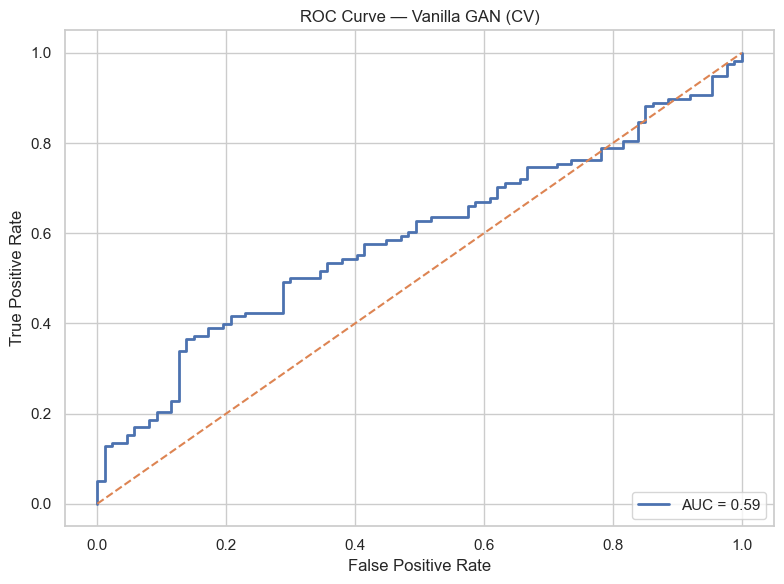


--- Vanilla GAN (Test) ---
Vanilla GAN (Test) — Precision=0.543, Recall=0.429, F1=0.479


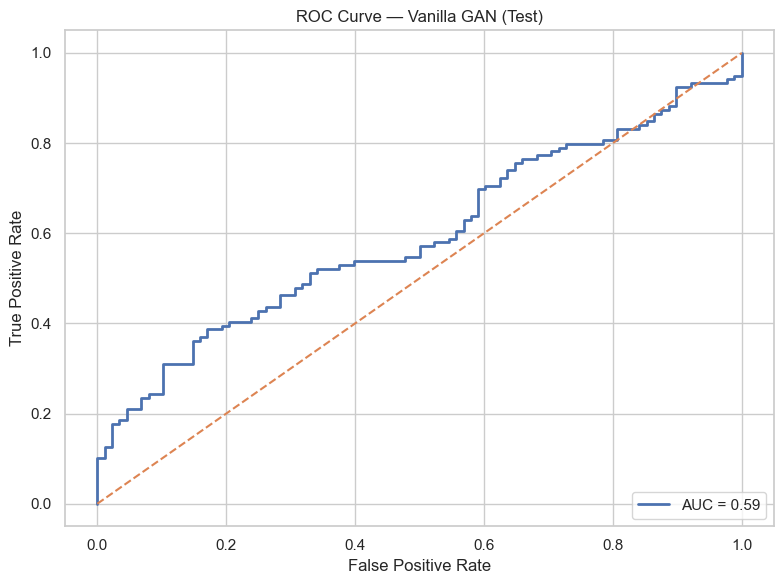

[I 2025-05-03 08:49:45,793] Using an existing study with name 'fanogan_study' instead of creating a new one.


🔎 Starting f-AnoGAN encoder search …
[GAN] Epoch 20/100 D=1.3779 G=0.6929
[GAN] Epoch 40/100 D=1.3799 G=0.7172
[GAN] Epoch 60/100 D=1.3928 G=0.6851
[GAN] Epoch 80/100 D=1.3714 G=0.6989
[GAN] Epoch 100/100 D=1.3875 G=0.6933
[Enc] Epoch 10/50 loss=0.7420
[Enc] Epoch 20/50 loss=0.6298
[Enc] Epoch 30/50 loss=0.5679
[Enc] Epoch 40/50 loss=0.5328


[I 2025-05-03 08:49:53,957] Trial 367 finished with value: 0.7575757575757576 and parameters: {'enc_lr': 0.000912165436737164, 'enc_epochs': 50, 'batch_size_fa': 128, 'lambda_fm': 0.06471894319731623}. Best is trial 50 with value: 0.7894736842105263.


[Enc] Epoch 50/50 loss=0.5216
🏆 Best f-AnoGAN F1: 0.7894736842105263
🔑 Best f-AnoGAN params: {'enc_lr': 0.0009989751192172336, 'enc_epochs': 150, 'batch_size_fa': 64, 'lambda_fm': 0.03912562287197306}
[GAN] Epoch 20/100 D=1.3887 G=0.7012
[GAN] Epoch 40/100 D=1.3891 G=0.7053
[GAN] Epoch 60/100 D=1.3812 G=0.6931
[GAN] Epoch 80/100 D=1.3662 G=0.6935
[GAN] Epoch 100/100 D=1.3862 G=0.7047
[Enc] Epoch 10/150 loss=0.6836
[Enc] Epoch 20/150 loss=0.5839
[Enc] Epoch 30/150 loss=0.5349
[Enc] Epoch 40/150 loss=0.5050
[Enc] Epoch 50/150 loss=0.4894
[Enc] Epoch 60/150 loss=0.4697
[Enc] Epoch 70/150 loss=0.4545
[Enc] Epoch 80/150 loss=0.4441
[Enc] Epoch 90/150 loss=0.4456
[Enc] Epoch 100/150 loss=0.4277
[Enc] Epoch 110/150 loss=0.4249
[Enc] Epoch 120/150 loss=0.4200
[Enc] Epoch 130/150 loss=0.4204
[Enc] Epoch 140/150 loss=0.4114
[Enc] Epoch 150/150 loss=0.4052

--- f-AnoGAN (Test) ---
f-AnoGAN (Test) — Precision=0.675, Recall=0.891, F1=0.768


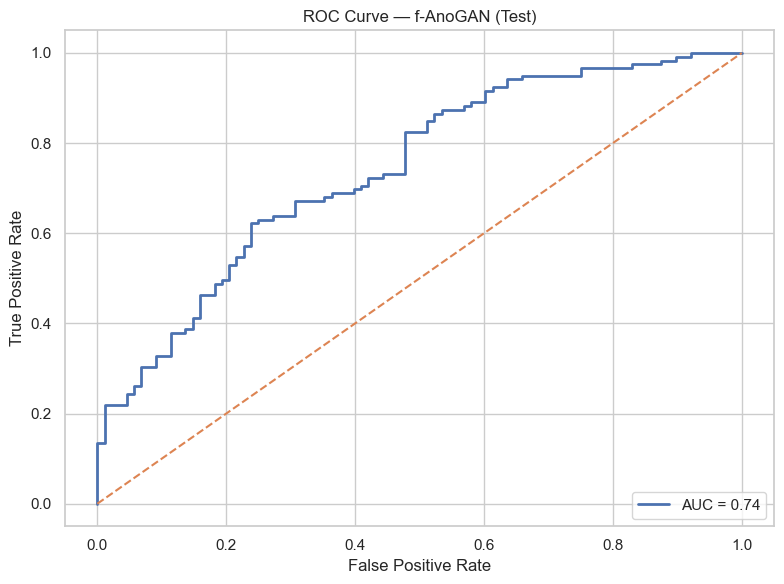

In [10]:
# 1) Vanilla GAN tuning
study_gan = run_optuna_gan(n_trials=1)

# Evaluate best GAN on CV and Test
best_g = study_gan.best_params
gan_model = GANomalyDetector(data_dim=X_train_scaled.shape[1],
                                latent_dim=best_g["latent_dim"])
gan_model.fit_gan(X_train_scaled,
                    n_epochs=best_g["n_epochs"],
                    batch_size=best_g["batch_size"],
                    lr=best_g["lr"])
gan_model.set_gan_threshold(X_train_scaled, contam)
print("\n--- Vanilla GAN (CV) ---")
gan_model.evaluate_gan(X_cv_scaled, y_cv,   name="Vanilla GAN (CV)")
print("\n--- Vanilla GAN (Test) ---")
gan_model.evaluate_gan(X_test_scaled,y_test, name="Vanilla GAN (Test)")

# 2) f-AnoGAN tuning
study_fa = run_optuna_fanogan(n_trials=1)
best_fa  = study_fa.best_params

# Final f-AnoGAN evaluation on Test
fa_model = GANomalyDetector(data_dim=X_train_scaled.shape[1],
                            latent_dim=best_g["latent_dim"],
                            lambda_fm=best_fa["lambda_fm"])
# retrain GAN + encoder
fa_model.fit_gan(X_train_scaled,
                    n_epochs=best_g["n_epochs"],
                    batch_size=best_g["batch_size"],
                    lr=best_g["lr"])
fa_model.fit_encoder(X_train_scaled,
                        enc_epochs=best_fa["enc_epochs"],
                        batch_size=best_fa["batch_size_fa"],
                        lr=best_fa["enc_lr"])
fa_model.set_recon_threshold(X_train_scaled, contam)
print("\n--- f-AnoGAN (Test) ---")
fa_model.evaluate_fanogan(X_test_scaled, y_test, name="f-AnoGAN (Test)")


In [21]:
import numpy as np
from pyod.models.copod import COPOD
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from pyod.models.iforest import IForest


# 1) Train COPOD on your training set (only normals)
#    Estimate contamination from your CV labels
raw_contam  = np.mean(y_cv)             # fraction of anomalies in CV
contam      = min(raw_contam, 0.5)      # cap at 50% if needed
copod       = COPOD(contamination=contam)
copod.fit(X_train_scaled)

# 3) Isolation Forest
iforest = IForest(contamination=contam, random_state=42)
iforest.fit(X_train_scaled)

# ―― 1) Compute anomaly scores on CV set ――
y_score_copod_cv   = copod.decision_function(X_cv_scaled)
_, y_score_fa_cv   = fa_model.predict_fanogan(X_cv_scaled)
y_score_if_cv      = iforest.decision_function(X_cv_scaled)

# 3) Build stacking feature matrix for CV
X_stack_cv = np.vstack([
    y_score_copod_cv,
    y_score_fa_cv,
    y_score_if_cv
]).T

# 4) Train a cost-sensitive RandomForest on CV
#    Up-weight normal class (0) to penalize false positives more heavily
clf = RandomForestClassifier(
    n_estimators=1000,
    class_weight={0: 10, 1: 1},
    random_state=42
)
clf.fit(X_stack_cv, y_cv)

# ―― 4) Compute anomaly scores on Test set ――
y_score_copod_t = copod.decision_function(X_test_scaled)
_, y_score_fa_t = fa_model.predict_fanogan(X_test_scaled)
y_score_if_t    = iforest.decision_function(X_test_scaled)

# ―― 5) Build stacking matrix for Test ――
X_stack_test = np.vstack([
    y_score_copod_t,
    y_score_fa_t,
    y_score_if_t
]).T

# 7) Predict with the stacked model
y_pred_stack = clf.predict(X_stack_test)
y_prob_stack = clf.predict_proba(X_stack_test)[:, 1]

# 8) Evaluate
print("Stacked RF classifier (COPOD + f-AnoGAN + IForest scores):")
print(classification_report(y_test, y_pred_stack, digits=4))
print("ROC AUC:", roc_auc_score(y_test, y_prob_stack))

Stacked RF classifier (COPOD + f-AnoGAN + IForest scores):
              precision    recall  f1-score   support

         0.0     0.5921    0.5114    0.5488        88
         1.0     0.6718    0.7395    0.7040       119

    accuracy                         0.6425       207
   macro avg     0.6319    0.6254    0.6264       207
weighted avg     0.6379    0.6425    0.6380       207

ROC AUC: 0.6832028265851795


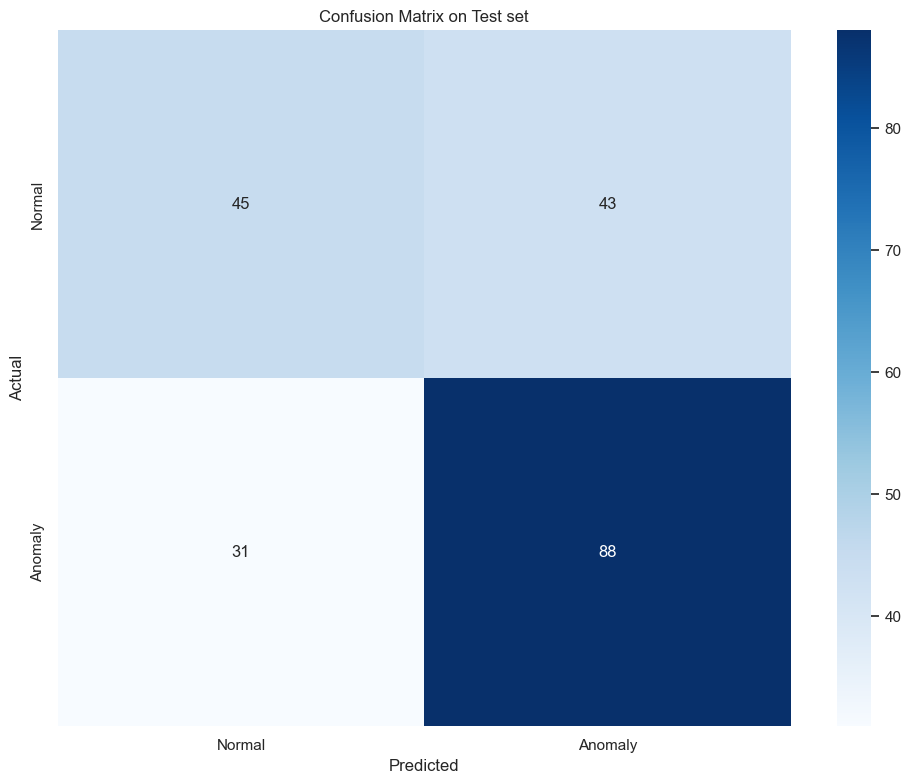

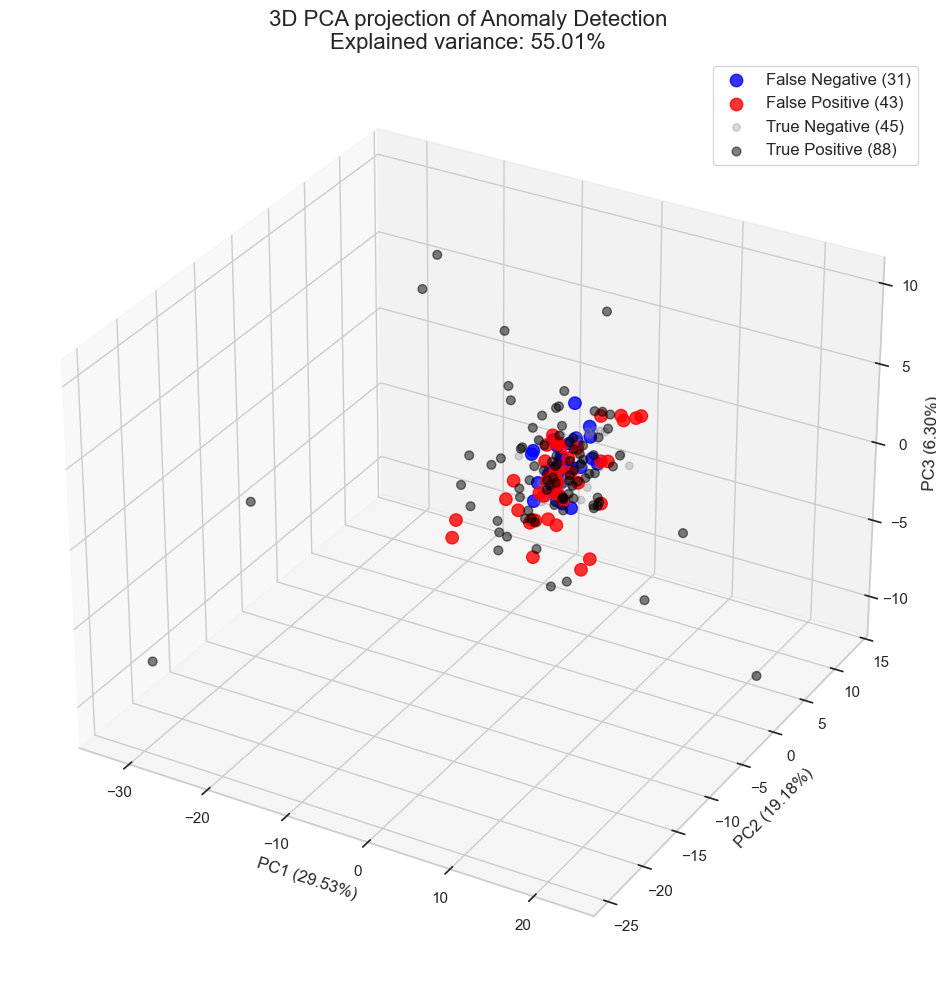

Variance explained by first two principal components: 55.01%


In [22]:

# Plot confusion matrix
cm = confusion_matrix(
    y_test, y_pred_stack
)
tn, fp, fn, tp = cm.ravel()

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Anomaly'],
            yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Test set')
plt.tight_layout()
plt.show()

# plot PCA
pca = PCA(n_components=3)
X_test_pca = pca.fit_transform(X_test)

# Create a DataFrame for easier plotting
pca_df = pd.DataFrame(X_test_pca, columns=['PC1', 'PC2','PC3'])
pca_df['Actual'] = y_test
pca_df['Predicted'] = y_pred_stack

# Create classification categories
pca_df['Category'] = 'Unknown'
pca_df.loc[(y_test == 0) & (y_pred_stack == 0), 'Category'] = 'True Negative'
pca_df.loc[(y_test == 0) & (y_pred_stack == 1), 'Category'] = 'False Positive'
pca_df.loc[(y_test == 1) & (y_pred_stack == 0), 'Category'] = 'False Negative'
pca_df.loc[(y_test == 1) & (y_pred_stack == 1), 'Category'] = 'True Positive'

# Calculate explained variance (just to know...)
explained_variance = pca.explained_variance_ratio_
total_variance = sum(explained_variance)


# Define colors and markers
colors = {'True Negative': 'gray', 'True Positive': 'black',
          'False Positive': 'red', 'False Negative': 'blue'}

# Use same marker for all to simplify
markers = {'True Negative': 'o', 'True Positive': 'o',
           'False Positive': 'o', 'False Negative': 'o'}

# Make misclassified points very visible
alphas = {'True Negative': 0.3, 'True Positive': 0.5,
          'False Positive': 0.8, 'False Negative': 0.8}

sizes = {'True Negative': 30, 'True Positive': 40,
         'False Positive': 80, 'False Negative': 80}

# Create a 3D scatter plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

for category, group in pca_df.groupby('Category'):
    ax.scatter(group['PC1'], group['PC2'], group['PC3'],
               color=colors[category],
               marker=markers[category],
               alpha=alphas[category],
               s=sizes[category],
               label=f"{category} ({len(group)})")
    

# Title and labels

ax.set_xlabel(f'PC1 ({explained_variance[0]:.2%})')
ax.set_ylabel(f'PC2 ({explained_variance[1]:.2%})')
ax.set_zlabel(f'PC3 ({explained_variance[2]:.2%})')



ax.set_title(f'3D PCA projection of Anomaly Detection\nExplained variance: {total_variance:.2%}', fontsize=16)
ax.legend(fontsize=12)
plt.tight_layout()
plt.show()


# Print variance explained
print(f"Variance explained by first two principal components: {total_variance:.2%}")

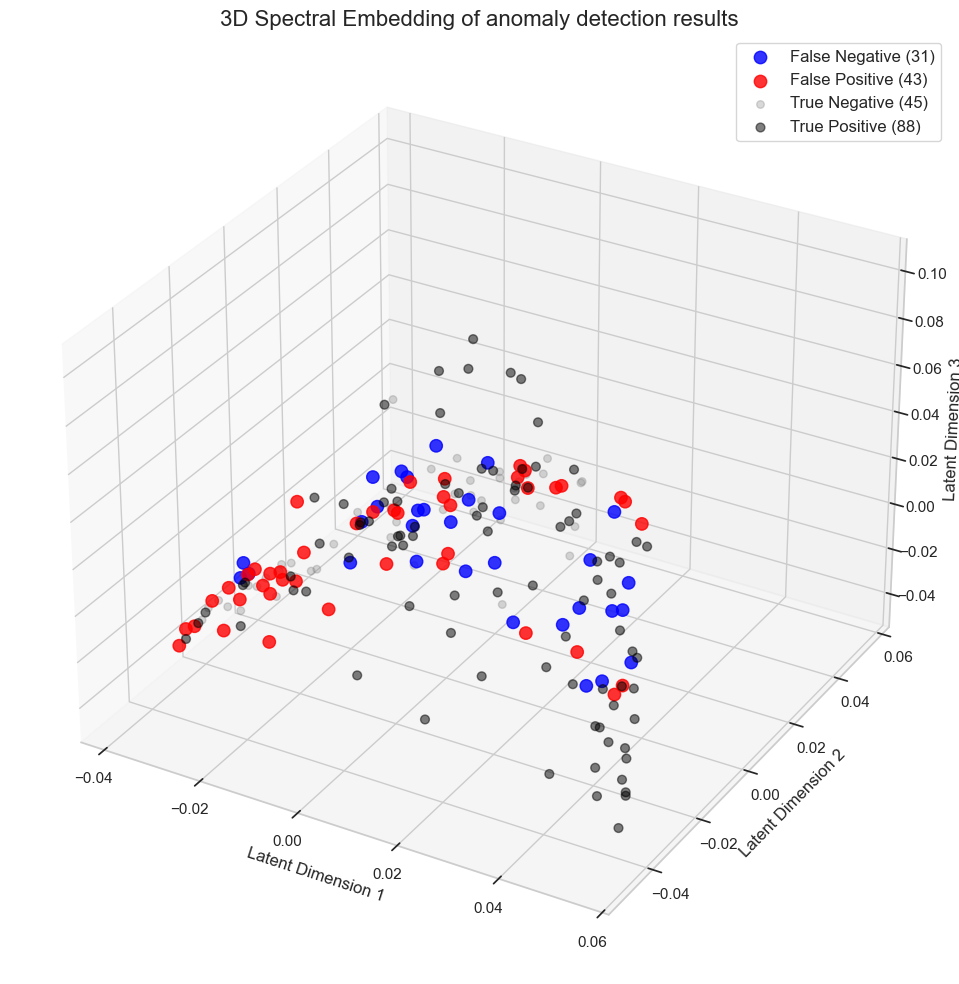

In [23]:
from sklearn.manifold import SpectralEmbedding
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Fit Spectral Embedding in 3D on the test set
spectral = SpectralEmbedding(n_components=3, affinity='nearest_neighbors', n_neighbors=10, random_state=42)
X_test_spectral = spectral.fit_transform(X_test)

# Create a DataFrame for 3D coordinates and labels
spectral_df = pd.DataFrame(X_test_spectral, columns=['Dim1', 'Dim2', 'Dim3'])
spectral_df['Category'] = pca_df['Category']  # carry over TN/TP/FP/FN labels

# Define visual styles as in your UMAP plot
colors = {'True Negative': 'gray', 'True Positive': 'black',
          'False Positive': 'red', 'False Negative': 'blue'}

sizes = {'True Negative': 30, 'True Positive': 40,
         'False Positive': 80, 'False Negative': 80}

alphas = {'True Negative': 0.3, 'True Positive': 0.5,
          'False Positive': 0.8, 'False Negative': 0.8}

# 3D scatter plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

for category, group in spectral_df.groupby('Category'):
    ax.scatter(group['Dim1'], group['Dim2'], group['Dim3'],
               c=colors[category],
               s=sizes[category],
               alpha=alphas[category],
               label=f"{category} ({len(group)})")

ax.set_title('3D Spectral Embedding of anomaly detection results', fontsize=16)
ax.set_xlabel('Latent Dimension 1')
ax.set_ylabel('Latent Dimension 2')
ax.set_zlabel('Latent Dimension 3')
ax.legend(fontsize=12)
plt.tight_layout()
plt.show()
